In [135]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
sns.set()
from scipy import stats
from pandas import DataFrame
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

# Read Data

In [136]:
battles = pd.read_csv('./gameofthrones/battles.csv', index_col = 0, header = 0)
deaths = pd.read_csv('./gameofthrones/character_deaths.csv', index_col = 0, header = 0)
predictions = pd.read_csv('./gameofthrones/character_predictions.csv', index_col = 0, header = 0)

In [137]:
print("Battles columns:\n", battles.columns, "\n", "\n",
      "Deaths columns: \n",deaths.columns, "\n", "\n",
      "Predictions columns:\n", predictions.columns)

Battles columns:
 Index(['year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2',
       'defender_3', 'defender_4', 'attacker_outcome', 'battle_type',
       'major_death', 'major_capture', 'attacker_size', 'defender_size',
       'attacker_commander', 'defender_commander', 'summer', 'location',
       'region', 'note'],
      dtype='object') 
 
 Deaths columns: 
 Index(['Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object') 
 
 Predictions columns:
 Index(['actual', 'pred', 'alive', 'plod', 'name', 'title', 'male', 'culture',
       'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir', 'house',
       'spouse', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother',
       'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'n

### summer/winter


In [138]:
mean = battles.groupby("summer").mean().reset_index()
print(scp.stats.f_oneway(mean['defender_size'], mean['summer']),
      scp.stats.f_oneway(mean['attacker_size'], mean['summer']))

F_onewayResult(statistic=3.7145004373641743, pvalue=0.19376606912486283) F_onewayResult(statistic=4.359959798198616, pvalue=0.1720310371550032)


# What a cruel world!!! 

In [145]:
battles_clean =battles[["defender_size", "attacker_size"]].dropna()
scp.stats.f_oneway(battles_clean['defender_size'], battles_clean['attacker_size'])

F_onewayResult(statistic=1.1323985146282722, pvalue=0.2957549542444754)

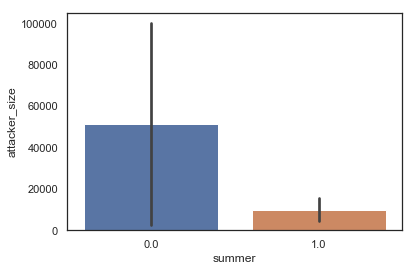

In [120]:
out=battles.groupby(["summer", 'attacker_outcome'])['attacker_size', 'defender_size'].mean().reset_index()
sns.barplot(x = "summer", y= 'attacker_size', data=out)

In [122]:
scp.stats.f_oneway(out['defender_size'], out['summer'])

F_onewayResult(statistic=3.24441042542099, pvalue=0.12174575455963191)

In [123]:
scp.stats.f_oneway(out['attacker_size'], out['summer'])

F_onewayResult(statistic=1.7310101036408307, pvalue=0.23631647030887812)

In [99]:
death_per_year = deaths.groupby(["Death Year"])["Allegiances"].count()
death_per_year_n = [death_per_year[1],
                death_per_year[2],
                    death_per_year[3]]
print(death_per_year_n)
death_per_year 

[46, 156, 100]


Death Year
297.0      3
298.0     46
299.0    156
300.0    100
alive    612
Name: Allegiances, dtype: int64

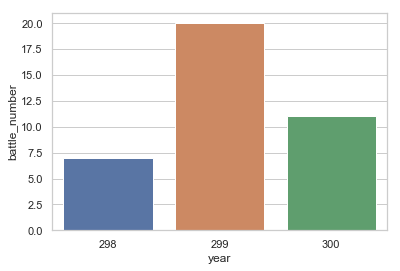

In [4]:
sns.set(style="whitegrid")
bat__per_year = battles.groupby("year").count().reset_index()
sns.barplot(x= "year",y=death_per_year = , data=bat__per_year)

In [147]:
bat__per_year

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,298,7,7,7,7,2,0,0,7,0,...,7,7,5,6,7,7,7,7,7,0
1,299,20,19,18,20,3,0,0,20,0,...,20,20,13,9,19,14,19,19,20,5
2,300,11,10,10,11,5,3,2,10,2,...,10,10,6,4,11,7,11,11,11,0


### we do not see any correlation between deaths and amount of buttles

In [148]:
scp.stats.f_oneway(bat__per_year['battle_number'], death_per_year_n )

F_onewayResult(statistic=7.568248452600721, pvalue=0.05131929705636451)

In [66]:
deaths['Death Year'].fillna("alive", inplace=True)
death_per_year = deaths.groupby(['Death Year', "Gender"]).size().reset_index()
death_per_year 

,Death Year,Gender,0
0,297,1,3
1,298,0,3
2,298,1,43
3,299,0,15
4,299,1,141
5,300,0,18
6,300,1,82
7,alive,0,121
8,alive,1,491


In [ ]:
anova(bat__per_year['battle_number'])

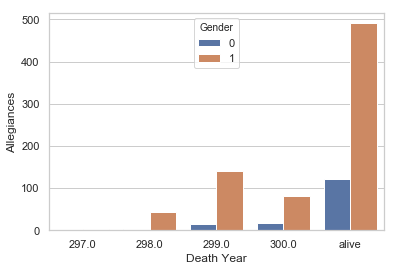

In [7]:
sns.set(style="whitegrid")
sns.barplot(x= 'Death Year',y='Allegiances', hue= "Gender", data=death_per_year)

# Usually the ones who attack  - win!!! Such a logic world!

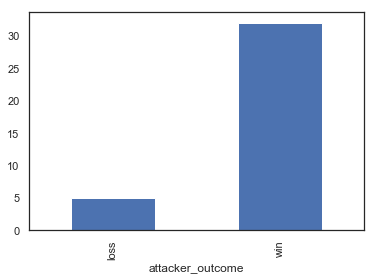

In [146]:
sns.set(style="white")
battles.groupby('attacker_outcome').size().plot(kind="bar")

# The most aggresive one is Joffrey/Tommen Baratheon

In [61]:
battle_outcome=battles.groupby(['attacker_outcome', 'attacker_king', 
                                 'defender_king']).size()

battle_outcome

attacker_outcome  attacker_king             defender_king           
loss              Joffrey/Tommen Baratheon  Robb Stark                  1
                  Robb Stark                Joffrey/Tommen Baratheon    2
                  Stannis Baratheon         Joffrey/Tommen Baratheon    1
                                            Mance Rayder                1
win               Balon/Euron Greyjoy       Balon/Euron Greyjoy         1
                                            Joffrey/Tommen Baratheon    2
                                            Robb Stark                  4
                  Joffrey/Tommen Baratheon  Balon/Euron Greyjoy         1
                                            Robb Stark                  9
                                            Stannis Baratheon           2
                  Robb Stark                Balon/Euron Greyjoy         1
                                            Joffrey/Tommen Baratheon    7
                  Stannis Baratheon        

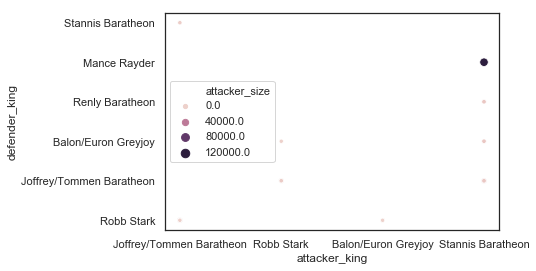

In [107]:
sns.set(style="white")
sns.scatterplot(x = battles['attacker_king'], y = battles['defender_king'],hue=battles['attacker_size'],
                size  = battles['attacker_size'], data=battles)

In [ ]:
ba

In [28]:
gender_death=deaths.groupby(["Gender", "Death Year"])['Allegiances'].size()
gender_death

Gender  Death Year
0       298.0           3
        299.0          15
        300.0          18
        alive         121
1       297.0           3
        298.0          43
        299.0         141
        300.0          82
        alive         491
Name: Allegiances, dtype: int64

In [23]:
attack_defend = battles.groupby(['attacker_king', 
                                 'defender_king'])['attacker_size', 
                                                   'defender_size'].mean().reset_index().dropna()
attack_defend 

,attacker_king,defender_king,attacker_size,defender_size
4,Joffrey/Tommen Baratheon,Robb Stark,8374.000000,5088.571429
5,Joffrey/Tommen Baratheon,Stannis Baratheon,2000.000000,200.000000
6,Robb Stark,Balon/Euron Greyjoy,244.000000,900.000000
7,Robb Stark,Joffrey/Tommen Baratheon,5853.571429,9745.000000
8,Stannis Baratheon,Balon/Euron Greyjoy,4500.000000,200.000000
9,Stannis Baratheon,Joffrey/Tommen Baratheon,13000.000000,7625.000000
10,Stannis Baratheon,Mance Rayder,100000.000000,1240.000000
11,Stannis Baratheon,Renly Baratheon,5000.000000,20000.000000


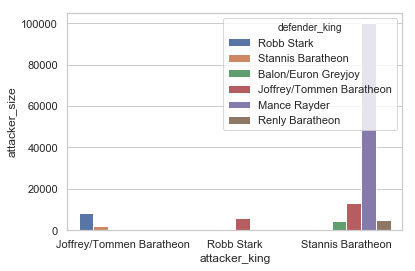

In [22]:
sns.set(style="whitegrid")
sns.barplot(x= 'attacker_king',y='attacker_size', hue= 'defender_king', data=attack_defend)
